# DATASCI W261: Machine Learning at Scale 

**Name: Carlos Eduardo Rodriguez Castillo**

**email: cerodriguez@berkeley.edu**

**Week 6**

**Section 2**

## HW6.0
* In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.

##### ANSWER:

In mathematics, computer science, economics, or management science, [mathematical optimization](https://en.wikipedia.org/wiki/Mathematical_optimization) is the process of selecting a best parameter, given some constraints or criteria, from a set of potential candidate parameters.

In the simplest case, a mathematical optimization problem is one where we are attempting to maximize or minimize a real function by systematically choosing input values from within an allowed set and computing the value of the function.

At AppNexus, a real-time online advertising platform, we are lucky enough to face several optimization problems! One of the main optimization problems that we deal with is that of bid price pacing; that is, advertisers on the AppNexus platform want to maximize clicks/conversions per unit of media cost, subject to the constraint of spending their entire budget.

This can be expressed as the objective function to maximize with respect to $x_i$:

$$\sum_{i=1}^nE_iF_i(x_i)(v_i-c(x_i))$$

subject to the constraint:

$$\sum_{i=1}^nE_iF_i(x_i)=S$$

where the decision variable is $x_i$ and the parameters are defined as:

$n$ := the number of distinct inventory chunks that a line item is bidding on

$x_i$ := the line item's bid price for inventory chunk $i$

$E_i$ := the number of eligible impressions that our line item sees from inventory chunk $i$ for some unit of time

$F_i(x_i)$ := the win rate curve on inventory chunk $i$

$v_i$ := the expected value of an impression for our line item on inventory chunk $i$ (i.e. the probability of a click/conversion multiplied by the value of a click/conversion)

$c_i(x_i)$ := the expected cost of an impression on inventory chunk $i$ given $X_i$

$S$ := the line item's target spend rate

Buyers on the AppNexus platform that buy natively through the AppNexus bidder can benefit from our using our bid price pacing engine to optimize ensure they pace their bidding optimally. It is used globally against billions of impressions by tens of thousands of line items every day!

## HW6.1  Optimization theory: 
* For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function 
$$X^3 -12x^2-6$$ defined over $[-6, 6]$

* Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.

* For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?

##### ANSWER:

For unconstrained univariate optimization, the first order necessary conditions for optimality (FOC), under the assumption that the function being optimized $f(x)$ is differentiable, is that the first derivative of $f(x)$ evaluates to zero for the value of the solution, $x^*$. The second order optimality conditions (SOC), under the assumption that the function being optimized $f(x)$ is twice differentiable, is that the second derivative of $f(x)$ evaluates to zero for the value of the solution, $x^*$ and that the second derivative of $f(x)$ is positive semi-definite. Mathematically this is defined as:

__FOC__ := For $f$ that is differentiable at a point $\bar{x}$, if $\bar{x}$ is a local solution to problem $\rho$, then $f'(\bar{x})=0$.

__SOC__ := For $f$ that is twice differentiable at a point $\bar{x}$, if $\bar{x}$ is a local solution to problem $\rho$, then $f'(\bar{x})=0$ and $f''(\bar{x})$ is positive, semi-definite.

See below for a graph of $f(x)$, $f'(x)$ and $f''(x)$. I have pointed out the candidate optimal point $(0,0)$ as a global maximum (for the domain $[-6, 6]$) by eyeballing the graphs. The FOC and SOC justify my selection as we can clearly see that $f'(x)=0$ given $x*=0$ and $f''(x) < 0$ for $x*=0$.

For unconstrained multi-variate optimization, the first order Necessary Conditions for Optimality (FOC) and the corresponding second order optimality conditions (SOC) are very similar to those observed in the univariate case, but in the multivariate case, the conditions need to be met across the dimensions of the multivariate function and as such the gradient (as opposed to the single variable derivative). Mathematically this is defined as:

__FOC__ := For $f$ that is differentiable at a point $\bar{x}$, if $\bar{x}$ is a local solution to problem $\rho$, then $\nabla f(\bar{x})=0$.

__SOC__ := For $f$ that is twice differentiable at a point $\bar{x}$, if $\bar{x}$ is a local solution to problem $\rho$, then $\nabla f(\bar{x})=0$ and $\nabla^2 f(\bar{x})$ is positive, semi-definite.

Finally, in this context the Hessian matrix is a square matrix of second-order partial derivatives of a scalar valued function. It describes the local curvature of a function of many variables. It is important as it needs to be computed to determine __SOC__ in unconstrained multi-variate optimization problems.

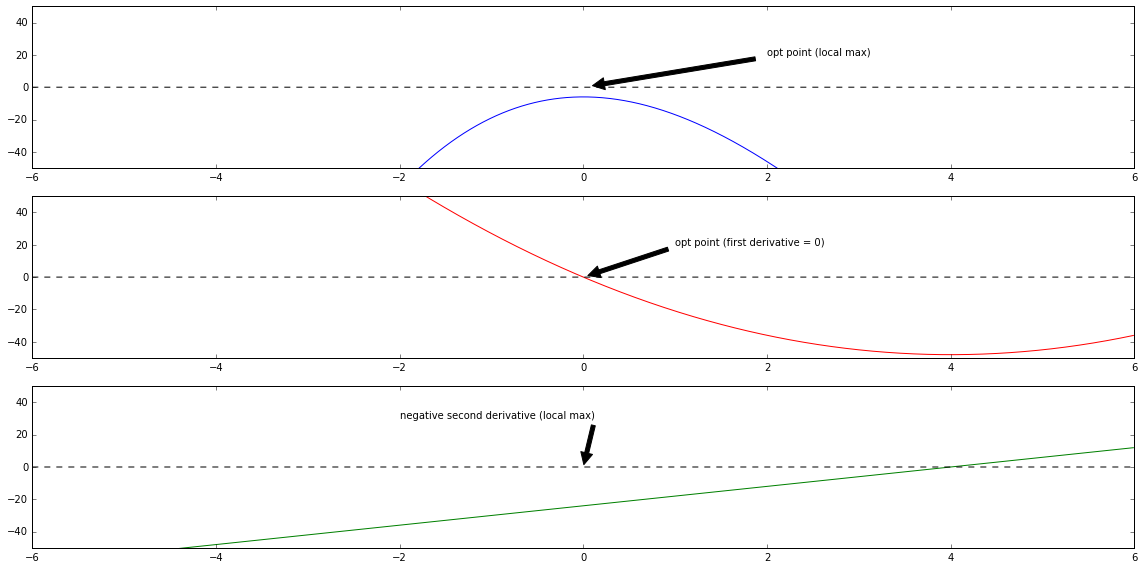

In [131]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
x = np.arange(-6, 6, 0.01)

def f(x):
    return x**3 - 12*x**2 - 6

def df(x):
    return 3*x**2 -24*x

def dff(x):
    return 6*x - 24

def zero_func(x):
    return 0*x

plt.figure(figsize = (16,8))
#  The subplot() command specifies numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols.
plt.subplot(311)
# plotting function f(x) = x^3 - 12x^2 - 6
plt.plot(x,
         f(x),
         'b',
        x,
        zero_func(x),
        'k--',
        linewidth=1.0)

plt.xlim(-6,6)
plt.ylim(-50,50)

plt.annotate('opt point (local max)', xy=(0, 0), xytext=(2, 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.subplot(312)
# plotting df(x)/dx
plt.plot(x,
         df(x),
         'r',
         x,
         zero_func(x),
        'k--',
         linewidth=1.0)

plt.annotate('opt point (first derivative = 0)', xy=(0, 0), xytext=(1, 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.xlim(-6,6)
plt.ylim(-50,50)

plt.subplot(313)
# plotting df(x)/dx
plt.plot(x,
         dff(x),
         'g',
         x,
         zero_func(x),
        'k--',
         linewidth=1.0)

plt.annotate('negative second derivative (local max)', xy=(0, 0), xytext=(-2, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.tight_layout()
plt.xlim(-6,6)
plt.ylim(-50,50)

plt.show()

## HW6.2
* Taking $x_0=1$ as the first approximation of a root of $X^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as $x_2$) of this root. (Hint the solution is $x_2=1.2$)

##### ANSWER:

Using the Newton-Raphson method, the second approximation, of a root of $x^3+2x-4=0$, using $x_0=1$, is $x_2=1.2$.

In [65]:
def derivative(f, x, h):
    deriv = (1.0/(2*h))*(f(x+h)-f(x-h))
    return deriv

def nr_method(f, x0, h, i):
    xn = x0
    iterations = 0
    while ( iterations < i):
        xn = xn - (f(xn))/derivative(f, xn, h)
        iterations += 1
    return xn

print "The second approximation of the Newton-Raphson method is: %.1f" %nr_method(f, 1, 0.1,2)

The second approximation of the Newton-Raphson method is: 1.2


## HW6.3 Convex optimization 
* What makes an optimization problem convex? What are the first order  Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?

Fill in the BLANKS here:
Convex minimization, a subfield of optimization, studies the problem of minimizing **BLANK** functions over **BLANK** sets. The **BLANK** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

##### ANSWER:

An optimization problem is convex if it meets the following conditions:
- if a local minimum solution exists for the problem, it is a global minimum
- the set of all minima is convex (all minima are global given the above point)
- for each strictly convex function, if the function has a minimum, then the minimum is unique

Filling in the __BLANKS__ here: Convex minimization, a subfield of optimization, studies the problem of minimizing __convex__ functions over __convex__ sets. The __convexity__ property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

## HW 6.4

The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

$$0.5* \sum_{i=1}^n (weight_i * (W * X_i - y_i)^2)$$

Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

##### ANSWER:

From the above we have the weighted ordinary least squares equation that is a function of the parameters in vector W:


$$WOLS(W)=\frac{1}{2}\sum_{i=1}^n(weight_i*(WX_i-y_i)^2)$$

Where:

$weight_i$ := the weight for observation $i$ in the WOLS equation. This is a scalar magnitude.

$W$ := the vector of parameters in the linear regression, $w_0, w_1, ..., w_p$, where $p$ is the degree of the polynomial being optimized. This is a $1*p$ dimensional vector.

$X_i$ := the vector of characteristics/dimensions/features, $x_{i1}, x_{i2}, ...,x_{ip}$, for observation $i$ where $p$ is the degree of the polynomial being optimized. This is a $p*1$ dimensional vector and there are n such vectors in the dataset.

$y_i$ := the target variable for observation $i$. This is a scalar magnitude.

Moving forward, I will set the following transformations:

$W$ is set to $W^T$

$X_i$ is set to $X_i^T$

Such that $WOLS(W)$ can be redefined to:

WOLS(W)=\frac{1}{2}\sum_{i=1}^n(weight_i*(X_iW-y_i)^2)

Calculating the gradient of $WOLS(W)$ minimizing the parameters of the vector $W$:

$$\nabla_W WOLS(W)=\nabla_W[\frac{1}{2}\sum_{i=1}^n(weight_i*(X_iW-y_i)^2)]=$$

Using the property $\sum_{i=1}^ne_i^2=e^Te$:

$$\nabla_W[\frac{1}{2}\sum_{i=1}^n(weight_i*(X_iW-y_i)^T(X_iW-y_i))]=$$

Expanding the multiplication term-by-term and using the properties $(AB)^T=B^TA^T$ and $(A + B)^T=A^T + B^T$:

$$\nabla_W[\frac{1}{2}\sum_{i=1}^n(weight_i*(W^TX_i^TX_iW-W^TX_i^Ty_i-y_i^TX_iW+y_i^Ty_i))]=$$

Here we use the fact that $WOLS(W)$ evaluates to a real number and the fact that the trace of a real number is still a real number to apply the trace function to our objective function:

$$\nabla_W[\frac{1}{2}\sum_{i=1}^n(weight_i*tr(W^TX_i^TX_iW-W^TX_i^Ty_i-y_i^TX_iW+y_i^Ty_i))]=$$

Here we use the properties $trA=trA^T$ and $(A^TB)^T=B^TA$:

$$\nabla_W[\frac{1}{2}\sum_{i=1}^n(weight_i*(trW^TX_i^TX_iW-2try_i^TX_iW+try_i^Ty_i))]=$$

Next we use $\nabla_{A^T}trABA_TC=B^TA^TC^T+BA^TC$ where $A^T=W$, $B=X_i^TX_i$, and $C=I$:

$$\frac{1}{2}\sum_{i=1}^n(weight_i*(X_i^TX_iW + X_i^TX_iW - 2X_i^Ty_i))=$$

$$\frac{1}{2}\sum_{i=1}^n(weight_i*(2X_i^TX_iW - 2X_i^Ty_i))=$$

$$\sum_{i=1}^n(weight_i*(X_i^TX_iW - X_i^Ty_i)=$$

$$\sum_{i=1}^n(weight_iX_i^T(X_iW - y_i)$$

## HW 6.5
Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent. <br>
Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 

$$weight(x)= abs(1/x)$$

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

##### ANSWER:

Below we see the plots for the 1% sampled data versus the population data for both the weighted OLS computed through MRJob as well as the weighted OLS computed through the SKLearn package. By lookiong at the graphs as well as checking the coefficients computed for each of the four scenarios, we see that all four scenarios provide __coefficients which are at least within .005 of the true coefficients they correspond to__.

|Linear Regression Coefficient|True value|MRJob (1% Sampling)|MRJob Total (Population)|SKLearn (1% Sampling)|SKLearn (Population)|
|---|---|---|---|---|---|
|intercept (b)|-4|-3.9551|-3.9592|-3.9907|-3.9645|
|slope (m)|1|0.9968|1.0000|0.9973|0.9998|

In [61]:
%matplotlib inline
import numpy as np
import pylab 
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x)
np.savetxt("/home/cloudera/w261/HW6/data/PopulationLinearRegression.csv",data,delimiter = "\t")

In [95]:
%%writefile buildSampleData.py
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from __future__ import division
import re
import numpy as np
import mrjob
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import RawValueProtocol
from mrjob.protocol import RawProtocol

class MRbuildSample(MRJob):

    MRJob.SORT_VALUES = True
    OUTPUT_PROTOCOL = RawProtocol

    def steps(self):
        JOBCONF_STEP1 = {    
            "mapred.reduce.tasks":1
            # ^^ Since we will end up with a relatively 
            # small file, letting hadoop handle the sort
        }

        return [MRStep(jobconf=JOBCONF_STEP1,
                    mapper=self.mapper,
                    reducer=self.reducer)
            ]
    
        
    def mapper(self,_,line):
        line = line.strip()
        y,x = line.split(",")
        
        s = np.random.uniform(0,1)
        # yield 1% of the data => .01
        if s < .01:
            yield float(y),float(x)

    def reducer(self,key,values):  
        for v in values:
            yield str(key), ","+str(v)
    
    
if __name__ == '__main__':
    MRbuildSample.run()

Overwriting buildSampleData.py


In [96]:
!chmod a+x buildSampleData.py
!./buildSampleData.py \
/home/cloudera/w261/HW6/data/PopulationLinearRegression.csv > \
/home/cloudera/w261/HW6/data/SampleLinearRegression.csv

Using configs in /home/cloudera/.mrjob.conf
ignoring partitioner keyword arg (requires real Hadoop): 'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
Creating temp directory /tmp/buildSampleData.cloudera.20160625.233304.645186
Running step 1 of 1...
Streaming final output from /tmp/buildSampleData.cloudera.20160625.233304.645186/output...
Removing temp directory /tmp/buildSampleData.cloudera.20160625.233304.645186...


In [98]:
%%writefile BatchGDUpdate_LR.py
#!/usr/bin/env python
from mrjob.job import MRJob
from mrjob.step import MRStep
import sys
import os
import math

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example

class MrJobBatchGDUpdate_LR(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        with open("weights.txt", "r") as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
#         sys.stderr.write(line)
        line = line.strip("\t")
#         print line
        D = (map(float,line.split(",")))
        # y_hat is the predicted value given current weights
        y_hat = self.weights[0]+self.weights[1]*D[1]
        observation_weight = math.abs(1 / float(D[1]))
        # Update parial gradient vector with gradient form current example
        self.partial_Gradient =  [self.partial_Gradient[0]+ (D[0]-y_hat)*observation_weight,
                                  self.partial_Gradient[1]+(D[0]-y_hat)*D[1]*observation_weight]
        self.partial_count = self.partial_count + 1
        #yield None, (D[0]-y_hat,(D[0]-y_hat)*D[1],1)

    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [MRStep(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == "__main__":
    MrJobBatchGDUpdate_LR.run()

Overwriting BatchGDUpdate_LR.py


In [129]:
from numpy import random,array
from BatchGDUpdate_LR import MrJobBatchGDUpdate_LR
#from MrJobBatchGDUpdate_LR import *

learning_rate = 0.05
stop_criteria = 0.000005

####################################
# Population MRJob Linear Regression
####################################

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open("weights.txt", "w") as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LR(args=["/home/cloudera/w261/HW6/data/PopulationLinearRegression.csv",
                                                  '--file=weights.txt'])
# Update weights iteratively
i = 0
while(1):
    print "iteration ="+str(i)+"  weights =",weights
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open("weights.txt", "w+") as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
with open("final_population_weights.txt","w") as f:
    f.writelines(','.join(str(j) for j in weights))
        
print "Final weights for Linear Regression on the Population\n"
print weights

iteration =0  weights = [-1.22126422 -2.99099994]
iteration =1  weights = [-1.36064723 -1.92652153]
iteration =2  weights = [-1.49294976 -1.14590078]
iteration =3  weights = [-1.61855553 -0.57344632]
iteration =4  weights = [-1.73782115 -0.15364994]
iteration =5  weights = [-1.85107959  0.1541953 ]
iteration =6  weights = [-1.95864292  0.37994179]
iteration =7  weights = [-2.06080446  0.54548174]
iteration =8  weights = [-2.15784062  0.6668698 ]
iteration =9  weights = [-2.25001228  0.75587959]
iteration =10  weights = [-2.33756605  0.82114529]
iteration =11  weights = [-2.4207353   0.86899874]
iteration =12  weights = [-2.49974109  0.90408338]
iteration =13  weights = [-2.57479292  0.92980444]
iteration =14  weights = [-2.64608946  0.94865913]
iteration =15  weights = [-2.71381921  0.96247876]
iteration =16  weights = [-2.77816102  0.9726063 ]
iteration =17  weights = [-2.83928469  0.98002661]
iteration =18  weights = [-2.89735139  0.9854619 ]
iteration =19  weights = [-2.9525142  0.9

In [102]:
from numpy import random,array
from BatchGDUpdate_LR import MrJobBatchGDUpdate_LR

learning_rate = 0.05
stop_criteria = 0.000005

####################################
#  Sample MRJob Linear Regression
####################################

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open("weights.txt", "w") as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LR(args=["/home/cloudera/w261/HW6/data/SampleLinearRegression.csv",
                                                  '--file=weights.txt'])
# Update centroids iteratively
i = 0
while(1):
    print "iteration ="+str(i)+"  weights =",weights
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open("weights.txt", "w+") as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
with open("final_sample_weights.txt","w") as f:
    f.writelines(','.join(str(j) for j in weights))

print "Final weights for Linear Regression on the Sample\n"
print weights

iteration =0  weights = [  1.65453945e+00  -4.14519663e-04]
iteration =1  weights = [ 1.37078825  0.27053072]
iteration =2  weights = [ 1.1015552   0.46936762]
iteration =3  weights = [ 0.84602641  0.6152124 ]
iteration =4  weights = [ 0.60345202  0.72211718]
iteration =5  weights = [ 0.37313678  0.80041137]
iteration =6  weights = [ 0.15443284  0.85768766]
iteration =7  weights = [-0.05326603  0.899527  ]
iteration =8  weights = [-0.2505289   0.93003142]
iteration =9  weights = [-0.43789141  0.9522158 ]
iteration =10  weights = [-0.61585872  0.96829585]
iteration =11  weights = [-0.78490805  0.97989982]
iteration =12  weights = [-0.94549075  0.98822412]
iteration =13  weights = [-1.09803416  0.99414772]
iteration =14  weights = [-1.24294318  0.99831628]
iteration =15  weights = [-1.38060165  1.00120396]
iteration =16  weights = [-1.51137368  1.00315885]
iteration =17  weights = [-1.63560473  1.00443641]
iteration =18  weights = [-1.75362266  1.00522401]
iteration =19  weights = [-1.86

Coefficients from MRJob Linear Regression (1MM observations):	-3.9592	1.0000
Coefficients from MRJob Linear Regression (1% sample from 1MM observations):	-3.9551	0.9968
Coefficients from SKLearn Linear Regression (1% Sample from 1MM observations):	-3.99069	0.99734
Coefficients from SKLearn Linear Regression (1MM observations):	-3.96445	0.99978


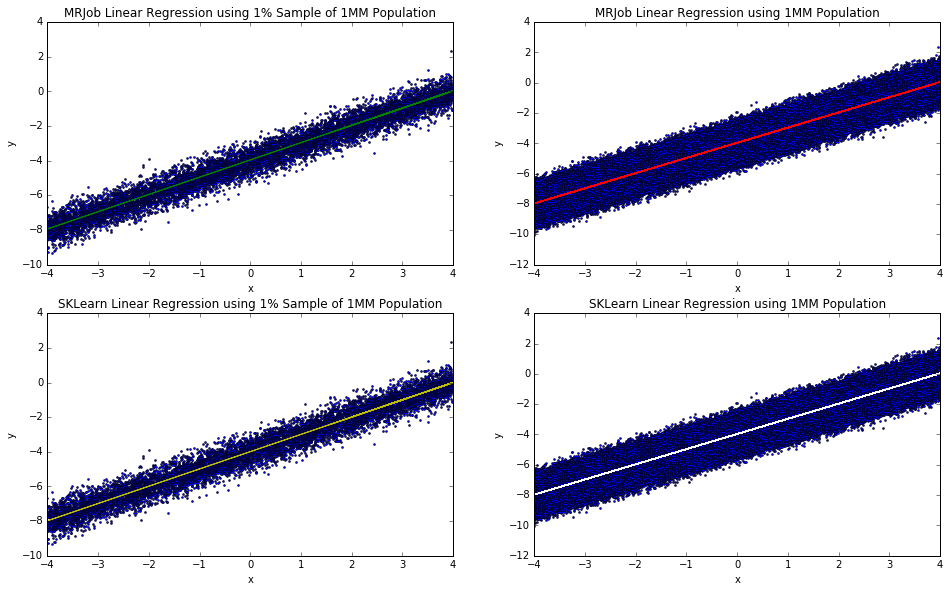

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

x_sample, y_sample, x_pop, y_pop = [], [], [], []
sample_count, population_count = 0, 0

with open("/home/cloudera/w261/HW6/data/SampleLinearRegression.csv", "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip("\t")
        y, x = line.split(",")
        x_sample.append(x)
        y_sample.append(y)
        sample_count += 1

with open("/home/cloudera/w261/HW6/data/PopulationLinearRegression.csv", "r") as f:
    for line in f:
        line = line.strip()
        y, x = line.split(",")
        x_pop.append(x)
        y_pop.append(y)
        population_count += 1
        
with open("/home/cloudera/w261/HW6/src/final_sample_weights.txt", "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip("\t")
        sample_mrjob_b, sample_mrjob_m = line.split(",")
        
with open("/home/cloudera/w261/HW6/src/final_population_weights.txt", "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip("\t")
        population_mrjob_b, population_mrjob_m = line.split(",")

###############################
## MRJob Linear Regression
###############################

sample_mrjob_y_pred = float(sample_mrjob_b) + float(sample_mrjob_m)*np.asarray(map(float, x_sample))
population_mrjob_y_pred = float(population_mrjob_b) + float(population_mrjob_m)*np.asarray(map(float, x_pop))

print "Coefficients from MRJob Linear Regression (1MM observations):\t%.4f\t%.4f"% (float(population_mrjob_b), float(population_mrjob_m))
print "Coefficients from MRJob Linear Regression (1%% sample from 1MM observations):\t%.4f\t%.4f"% (float(sample_mrjob_b), float(sample_mrjob_m))

###################################
## SKLearn Linear Regression Sample
###################################

sampleData = []
with open("/home/cloudera/w261/HW6/data/SampleLinearRegression.csv","r") as f:
    for line in f.readlines():
        x_s, y_s = line.split(',')
        sampleData.append([float(x_s),float(y_s)])

l = len(sampleData)
X_sample = np.array(sampleData)[:,1].reshape((l,1))
Y_sample = np.array(sampleData)[:,0].reshape((l,1))

#generate weight
w_sample=abs(1/X_sample).ravel()

# Create linear regression object
sample_model = linear_model.LinearRegression()

# Train the model using the training sets
sample_model.fit(X_sample, Y_sample,sample_weight=w_sample)

Y_sample_pred = sample_model.intercept_[0] + sample_model.coef_[0][0]*np.asarray(map(float, x_sample))

# The SKLearn coefficients for the sample
print "Coefficients from SKLearn Linear Regression (1%% Sample from 1MM observations):\t%.5f\t%.5f" % (sample_model.intercept_[0],sample_model.coef_[0][0])

#######################################
## SKLearn Linear Regression Population
#######################################

popData = []
with open("/home/cloudera/w261/HW6/data/PopulationLinearRegression.csv","r") as f:
    for line in f.readlines():
        x_p, y_p = line.split(',')
        popData.append([float(x_p),float(y_p)])

l = len(popData)
X_population = np.array(popData)[:,1].reshape((l,1))
Y_population = np.array(popData)[:,0].reshape((l,1))

#generate weight
w_population=abs(1/X_population).ravel()

# Create linear regression object
population_model = linear_model.LinearRegression()

# Train the model using the training sets
population_model.fit(X_population,
                     Y_population,
                     sample_weight=w_population)

Y_population_pred = population_model.intercept_[0] + population_model.coef_[0][0]*np.asarray(map(float, x_pop))

# The SKLearn coefficients for the population
print "Coefficients from SKLearn Linear Regression (1MM observations):\t%.5f\t%.5f" % (population_model.intercept_[0],population_model.coef_[0][0])

##############################
## Plotting results
##############################

plt.figure(figsize = (16,20))
plt.subplot(4,2,1)
plt.plot(x_sample, y_sample, 'o', ms=2 )
plt.plot(x_sample, sample_mrjob_y_pred, c='g', lw=1)

plt.ylabel("y")
plt.xlabel("x")
plt.title("MRJob Linear Regression using 1% Sample of 1MM Population")

plt.subplot(4,2,2)
plt.plot(x_pop, y_pop, 'o', ms=2 )
plt.plot(x_pop, population_mrjob_y_pred, c='r', lw=1)
plt.ylabel("y")
plt.xlabel("x")
plt.title("MRJob Linear Regression using 1MM Population")

plt.subplot(4,2,3)
plt.plot(x_sample, y_sample, 'o', ms=2 )
plt.plot(x_sample, Y_sample_pred, c='y', lw=1)
plt.ylabel("y")
plt.xlabel("x")
plt.title("SKLearn Linear Regression using 1% Sample of 1MM Population")

plt.subplot(4,2,4)
plt.plot(x_pop, y_pop, 'o', ms=2 )
plt.plot(x_pop, Y_population_pred, c='w', lw=1)
plt.ylabel("y")
plt.xlabel("x")
plt.title("SKLearn Linear Regression using 1MM Population")
plt.show()

## HW6.5.1 (OPTIONAL)
Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space.  (Plot them side by side if possible)
Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.
Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.


## HW6.6 Clean up notebook for GMM via EM

Using the following notebook as a starting point:

http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

Improve this notebook as follows:
-- Add in equations into the notebook (not images of equations) 
-- Number the equations
-- Make sure the equation notation matches the code and the code and comments refer to the equations numbers
-- Comment the code
-- Rename/Reorganize the code to make it more readable
-- Rerun the examples similar graphics (or possibly better graphics)


## HW6.7  Implement Bernoulli Mixture Model via EM
Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

As a unit test use the dataset in the following slides:

https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Dont forget the smoothing.

As a full test: use the same dataset from HW 4.5, the Tweet Dataset. 
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using K = 4.  Use the same smoothing as in the unit test.

Repeat this experiment using your KMeans MRJob implementation fron HW4.
Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

Here is some more information on the Tweet Dataset.

Here you will use a different dataset consisting of word-frequency distributions 
for 1,000 Twitter users. These Twitter users use language in very different ways,
and were classified by hand according to the criteria:

0: Human, where only basic human-human communication is observed.

1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).

2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).

3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,
which spawned this dataset:

http://arxiv.org/abs/1505.04342
http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:

topUsers_Apr-Jul_2014_1000-words.txt

and are of the form:

USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.

where

USERID = unique user identifier
CODE = 0/1/2/3 class code
TOTAL = sum of the word counts

Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.



## HW6.8 (OPTIONAL) 1 Million songs
Predict the year of the song. Ask Jimi





